In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import specific modules from scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Notes:
# - Pandas (pd) is a data manipulation library in Python.
# - NumPy (np) is a library for numerical computing in Python.
# - Seaborn (sns) is a statistical data visualization library.
# - Matplotlib.pyplot (plt) is a plotting library in Python.
# - From scikit-learn (sklearn), we're importing StandardScaler for scaling features
#   and train_test_split for splitting data into training and testing sets.
# - These libraries/modules are commonly used for data preprocessing, visualization, and machine learning tasks.

In [2]:
# Read the CSV file 'ds_salaries.csv' into a DataFrame using pandas
df = pd.read_csv('ds_salaries.csv')

# Display the DataFrame
df

# Notes:

# pd.read_csv('ds_salaries.csv'): This function reads the CSV file named 'ds_salaries.csv' and creates a pandas DataFrame from it.
# df: This variable holds the DataFrame containing the data from the CSV file.
# The second line simply displays the DataFrame. This is often done in interactive environments like Jupyter notebooks or in scripts to quickly inspect the data after loading it.

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


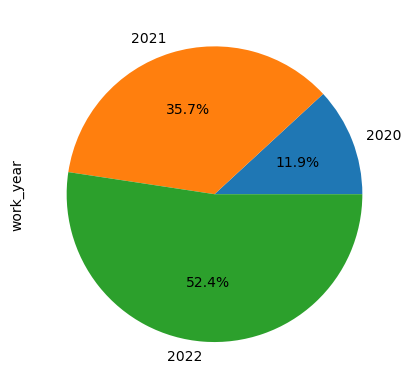

In [3]:
# Group the DataFrame 'df' by the 'work_year' column, count the occurrences of each group, and plot a pie chart
df.groupby('work_year')['work_year'].count().plot.pie(autopct="%1.1f%%");

# Notes:
# - df.groupby('work_year'): Groups the DataFrame 'df' by the values in the 'work_year' column.
# - ['work_year'].count(): Counts the occurrences of each group.
# - .plot.pie(): Plots the grouped data as a pie chart.
# - autopct="%1.1f%%": Specifies the format for the percentages shown on the pie chart. It displays one decimal place.
# - The semicolon (;) at the end suppresses unnecessary output and is often used in interactive environments.


In [4]:
# Count the occurrences of each unique value in the 'work_year' column of the DataFrame 'df'
df['work_year'].value_counts()

# Notes:
# - df['work_year']: Accesses the 'work_year' column of the DataFrame 'df'.
# - .value_counts(): Counts the occurrences of each unique value in the 'work_year' column.
# - This code returns a pandas Series where the index represents unique work years, and the values represent the counts of each work year in the dataset.

work_year
2022    318
2021    217
2020     72
Name: count, dtype: int64

In [5]:
# Drop the column 'Unnamed: 0' from the DataFrame 'df'
df = df.drop(columns=['Unnamed: 0'])

# Notes:
# - df.drop(columns=['Unnamed: 0']): This function drops the specified column(s) from the DataFrame 'df'.
# - 'Unnamed: 0': This is the name of the column to be dropped. It's common to encounter this when reading CSV files that have an unnamed index column.
# - The 'columns' parameter specifies which columns to drop.
# - This operation modifies the DataFrame 'df' by removing the specified column.

In [6]:
# Display concise summary information about the DataFrame 'df'
df.info()

# Notes:
# - df.info(): This function provides a concise summary of the DataFrame 'df'.
# - The summary includes information such as the total number of entries, the data types of each column, and the number of non-null values.
# - This is a useful method to quickly understand the structure and properties of the DataFrame, such as identifying missing values or incorrect data types.
# - It's commonly used for data exploration and initial data inspection.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [7]:
# Check for missing values (NaN) in the DataFrame 'df' and sum the number of missing values for each column
df.isna().sum()

# Notes:
# - df.isna(): This function checks each element in the DataFrame 'df' to see if it's NaN (missing).
# - .sum(): After checking for missing values, this function sums up the number of missing values for each column.
# - This code returns a Series where the index represents column names, and the values represent the count of missing values in each column.
# - It's a common practice to check for missing values to assess data quality and decide on strategies for handling them, such as imputation or removal.

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
# Check for duplicated rows in the DataFrame 'df' and sum the number of duplicated rows
df.duplicated().sum()

# Notes:
# - df.duplicated(): This function checks each row in the DataFrame 'df' to see if it's a duplicate of a previous row.
# - .sum(): After checking for duplicates, this function sums up the number of duplicated rows.
# - This code returns the total count of duplicated rows in the DataFrame.
# - Duplicated rows can indicate potential issues such as data entry errors or duplication during data collection.
# - Identifying duplicated rows is crucial for data cleaning and ensuring data integrity.

42

In [9]:
# Select rows in the DataFrame 'df' that are duplicated, keeping all occurrences, then sort the result by the 'job_title' column and display the first 6 rows
df[df.duplicated(keep=False)].sort_values('job_title').head(6)

# Notes:
# - df.duplicated(keep=False): This function checks for duplicated rows in the DataFrame 'df', keeping all occurrences of duplicated rows.
# - The result is a boolean mask indicating rows that are duplicates.
# - df[df.duplicated(keep=False)]: This syntax is used to filter the DataFrame 'df' based on the boolean mask obtained from df.duplicated(keep=False), selecting only the duplicated rows.
# - .sort_values('job_title'): This function sorts the selected duplicated rows based on the values in the 'job_title' column.
# - .head(6): This function displays the first 6 rows of the sorted DataFrame.
# - The combination of these operations helps to identify and display duplicated rows in the DataFrame, sorted by the job title.

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
597,2022,SE,FT,Data Analyst,170000,USD,170000,US,100,US,M
406,2022,MI,FT,Data Analyst,58000,USD,58000,US,0,US,S
393,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
392,2022,SE,FT,Data Analyst,112900,USD,112900,US,100,US,M
527,2022,SE,FT,Data Analyst,135000,USD,135000,US,100,US,M
528,2022,SE,FT,Data Analyst,100000,USD,100000,US,100,US,M


In [10]:
# Remove duplicated rows from the DataFrame 'df'
df = df.drop_duplicates()

# Notes:
# - df.drop_duplicates(): This function removes duplicated rows from the DataFrame 'df'.
# - By default, it keeps the first occurrence of each duplicated row and removes the subsequent duplicates.
# - If no parameters are provided, it considers all columns for identifying duplicates.
# - After removing duplicates, the DataFrame 'df' is reassigned to the result, effectively updating it without the duplicated rows.
# - Dropping duplicates helps to ensure data integrity and accuracy, particularly when preparing data for analysis or modeling.

In [11]:
# Count the number of duplicated rows in the DataFrame 'df'
df.duplicated().sum()

# Notes:
# - df.duplicated(): This function checks each row in the DataFrame 'df' to see if it's a duplicate of a previous row.
# - .sum(): After checking for duplicates, this function sums up the number of duplicated rows.
# - This code returns the total count of duplicated rows in the DataFrame.
# - Duplicated rows can indicate potential issues such as data entry errors or duplication during data collection.
# - By counting duplicated rows after removing them, we can verify if all duplicates have been successfully removed.

0

In [12]:
# Reset the index of the DataFrame 'df' and drop the old index
df = df.reset_index(drop=True)

# Notes:
# - df.reset_index(): This function resets the index of the DataFrame 'df'.
# - drop=True: This parameter specifies whether to drop the old index column after resetting the index. Setting it to True ensures that the old index column is removed.
# - After resetting the index, the DataFrame 'df' is reassigned to the result.
# - Resetting the index can be useful after operations that modify the DataFrame's structure, such as removing rows or reordering data.
# - It helps to ensure that the index is continuous and starts from 0, which can be important for subsequent data processing and analysis.

In [13]:
# Replace abbreviated terms in the 'experience_level' column with their corresponding full terms
df.experience_level.replace(['EN','MI','SE','EX'],['Entry-level','Mid-level','Senior-level', 'Expert-level'], inplace=True)

# Replace abbreviated terms in the 'employment_type' column with their corresponding full terms
df.employment_type.replace(['PT','CT','FT','FL'],['Part-time','Contract','Full-time', 'Freelance'], inplace=True)

# Replace numerical values in the 'remote_ratio' column with their corresponding descriptions
df.remote_ratio.replace([0,50,100],['Onsite','Hybrid','Remote'], inplace=True)

# Replace abbreviated terms in the 'company_size' column with their corresponding full terms
df.company_size.replace(['S','M','L'],['Small','Medium','Large'], inplace=True)

# Display the first few rows of the DataFrame after the replacements
df.head()

# Notes:

# The code uses the .replace() method to replace specific values in each column with their corresponding full terms or descriptions.
# The inplace=True parameter ensures that the modifications are applied directly to the DataFrame without the need for reassignment.
# These replacements are often done for better readability and understanding of the data, particularly when dealing with categorical variables or codes.
# After performing the replacements, df.head() is used to display the first few rows of the DataFrame to verify the changes.

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level,Full-time,Data Scientist,70000,EUR,79833,DE,Onsite,DE,Large
1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,USD,260000,JP,Onsite,JP,Small
2,2020,Senior-level,Full-time,Big Data Engineer,85000,GBP,109024,GB,Hybrid,GB,Medium
3,2020,Mid-level,Full-time,Product Data Analyst,20000,USD,20000,HN,Onsite,HN,Small
4,2020,Senior-level,Full-time,Machine Learning Engineer,150000,USD,150000,US,Hybrid,US,Large


In [14]:
# Display concise summary information about the DataFrame 'df'
df.info()

# Notes:
# - df.info(): This function provides a concise summary of the DataFrame 'df'.
# - The summary includes information such as the total number of entries, the data types of each column, and the number of non-null values.
# - It's a useful method to quickly understand the structure and properties of the DataFrame, such as identifying missing values or incorrect data types.
# - This summary helps in data exploration and initial data inspection, enabling you to assess the data quality and determine further processing steps.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           565 non-null    int64 
 1   experience_level    565 non-null    object
 2   employment_type     565 non-null    object
 3   job_title           565 non-null    object
 4   salary              565 non-null    int64 
 5   salary_currency     565 non-null    object
 6   salary_in_usd       565 non-null    int64 
 7   employee_residence  565 non-null    object
 8   remote_ratio        565 non-null    object
 9   company_location    565 non-null    object
 10  company_size        565 non-null    object
dtypes: int64(3), object(8)
memory usage: 48.7+ KB


In [15]:
# Create an empty dictionary to store the count of unique values for each column
dict = {}

# Iterate through each column in the DataFrame 'df'
for col in df.columns:
    # Calculate the number of unique values in the current column and store it in the dictionary
    dict[col] = df[col].value_counts().shape[0]

# Create a DataFrame from the dictionary with a single row indicating the count of unique values for each column
pd.DataFrame(dict, index=['unique value count']).transpose()

# Notes:
# - This code iterates through each column in the DataFrame 'df' to determine the count of unique values in each column.
# - It uses a dictionary to store the count of unique values for each column, where the column names are keys and the count of unique values is the corresponding value.
# - For each column, df[col].value_counts() calculates the frequency of each unique value, and shape[0] gives the count of unique values.
# - The resulting dictionary is then used to create a DataFrame using pd.DataFrame().
# - The index is set to ['unique value count'] to indicate that the row contains the count of unique values for each column.
# - Transposing the DataFrame swaps the rows and columns, making it easier to read with columns representing the original DataFrame columns and a single row indicating the count of unique values.

,unique value count
work_year,3
experience_level,4
employment_type,4
job_title,50
salary,272
salary_currency,17
salary_in_usd,369
employee_residence,57
remote_ratio,3
company_location,50


In [16]:
# Count the number of unique values for each column in the DataFrame 'df'
df.nunique()

# Notes:
# - df.nunique(): This function calculates the number of unique values for each column in the DataFrame 'df'.
# - It returns a Series where the index represents column names, and the values represent the count of unique values in each column.
# - This method is a convenient way to quickly assess the diversity and variability of values within each column of the DataFrame.
# - It's particularly useful for identifying columns with a low number of unique values, which may indicate categorical variables or potential features for analysis.

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [17]:
# Generate descriptive statistics for numerical columns in the DataFrame 'df'
df.describe()

# Notes:
# - df.describe(): This function generates descriptive statistics for numerical columns in the DataFrame 'df'.
# - The descriptive statistics include count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum values.
# - By default, it only includes numerical columns in the analysis. 
# - This method provides a summary of the central tendency, dispersion, and shape of the distribution of numerical data, helping to understand the data's distribution and identify potential outliers.
# - It's commonly used for initial data exploration and understanding the characteristics of the dataset.

,work_year,salary,salary_in_usd
count,565.000000,5.650000e+02,565.000000
mean,2021.364602,3.381160e+05,110610.343363
std,0.698138,1.599879e+06,72280.702792
min,2020.000000,4.000000e+03,2859.000000
25%,2021.000000,6.700000e+04,60757.000000
50%,2021.000000,1.109250e+05,100000.000000
75%,2022.000000,1.650000e+05,150000.000000
max,2022.000000,3.040000e+07,600000.000000


In [18]:
# Get a list of all columns in the DataFrame 'df'
all_columns = df.columns.to_list()

# Specify the columns considered numerical
numerical = ['work_year', 'salary', 'salary_in_usd']

# Calculate the list of categorical columns by subtracting numerical columns from all columns
categorical = list(set(all_columns) - set(numerical))

# Notes:
# - df.columns.to_list(): This function converts the column index of the DataFrame 'df' to a list, giving a list of all column names.
# - 'all_columns': This variable stores a list containing all column names from the DataFrame.
# - 'numerical': This variable specifies the columns considered numerical based on domain knowledge or data characteristics.
# - 'categorical': This variable is calculated by subtracting the numerical columns from all columns, resulting in a list of categorical columns.
# - This approach is commonly used to categorize columns based on their data types or characteristics for further data analysis or preprocessing.

In [19]:
# Iterate through each categorical column in the DataFrame 'df'
for i in df[categorical].columns:
    # Count the occurrences of each unique value in the current categorical column
    x = df[categorical][i].value_counts()
    
    # Print the name of the current categorical column
    print(i)
    
    # Print the value counts for the current categorical column
    print(x, '\n')

# Notes:
# - 'for i in df[categorical].columns:': This loop iterates through each categorical column in the DataFrame 'df'.
# - 'df[categorical][i].value_counts()': This expression calculates the frequency of each unique value in the current categorical column 'i'.
# - 'x': This variable stores the result of value counts for the current categorical column.
# - 'print(i)': This statement prints the name of the current categorical column.
# - 'print(x, '\n')': This statement prints the value counts for the current categorical column, followed by a newline character for better readability.
# - The loop helps in analyzing the distribution of categorical variables by printing the frequency of each unique value in each categorical column.

company_location
company_location
US    318
GB     46
CA     28
DE     27
IN     24
FR     15
ES     14
GR     10
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: count, dtype: int64 

salary_currency
salary_currency
USD    359
EUR     93
GBP     43
INR     27
CAD     18
JPY      3
PLN      3
TRY      3
CNY      2
MXN      2
HUF      2
DKK      2
SGD      2
BRL      2
AUD      2
CLP      1
CHF      1
Name: count, dtype: int64 

experience_level
experience_level
Senior-level    243
Mid-level       208
Entry-level      88
Expert-level     26
Name: count, dtype: int64 

job_title
job_title
Data Scientist               

In [20]:
# Get a list of all columns in the DataFrame 'df'
all_columns = df.columns.to_list()

# Specify the columns considered numerical
numerical = ['work_year', 'salary', 'salary_in_usd']

# Calculate the list of categorical columns by subtracting numerical columns from all columns
categorical = list(set(all_columns) - set(numerical))

# Notes:
# - df.columns.to_list(): This function converts the column index of the DataFrame 'df' to a list, giving a list of all column names.
# - 'all_columns': This variable stores a list containing all column names from the DataFrame.
# - 'numerical': This variable specifies the columns considered numerical based on domain knowledge or data characteristics.
# - 'categorical': This variable is calculated by subtracting the numerical columns from all columns, resulting in a list of categorical columns.
# - This approach is commonly used to categorize columns based on their data types or characteristics for further data analysis or preprocessing.

In [21]:
# Select columns from the DataFrame 'df' that are considered numerical based on the 'numerical' list
df[numerical]

# Notes:
# - df[numerical]: This expression selects columns from the DataFrame 'df' based on the list 'numerical'.
# - 'numerical': This list contains the names of columns that are considered numerical based on domain knowledge or data characteristics.
# - By passing 'numerical' as an index to the DataFrame, it selects only the columns specified in the 'numerical' list.
# - This approach is useful when you want to focus on analyzing or performing operations specifically on numerical columns in the DataFrame.
# - It helps in isolating and working with specific types of data within the DataFrame, such as for statistical analysis or modeling purposes.

,work_year,salary,salary_in_usd
0,2020,70000,79833
1,2020,260000,260000
2,2020,85000,109024
3,2020,20000,20000
4,2020,150000,150000
...,...,...,...
560,2022,154000,154000
561,2022,126000,126000
562,2022,129000,129000
563,2022,150000,150000


In [22]:
# Generate descriptive statistics for numerical columns in the DataFrame 'df'
df[numerical].describe()

# Notes:
# - df[numerical]: This expression selects columns from the DataFrame 'df' based on the list 'numerical'.
# - 'numerical': This list contains the names of columns that are considered numerical based on domain knowledge or data characteristics.
# - By passing 'numerical' as an index to the DataFrame, it selects only the numerical columns specified in the 'numerical' list.
# - .describe(): This method generates descriptive statistics for the selected numerical columns.
# - The descriptive statistics include count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum values.
# - This method provides a summary of the central tendency, dispersion, and shape of the distribution of numerical data in the DataFrame.
# - It's commonly used for initial data exploration and understanding the characteristics of numerical features in the dataset.

,work_year,salary,salary_in_usd
count,565.000000,5.650000e+02,565.000000
mean,2021.364602,3.381160e+05,110610.343363
std,0.698138,1.599879e+06,72280.702792
min,2020.000000,4.000000e+03,2859.000000
25%,2021.000000,6.700000e+04,60757.000000
50%,2021.000000,1.109250e+05,100000.000000
75%,2022.000000,1.650000e+05,150000.000000
max,2022.000000,3.040000e+07,600000.000000


In [23]:
# Select columns from the DataFrame 'df' that are considered categorical based on the 'categorical' list
df[categorical]

# Notes:
# - df[categorical]: This expression selects columns from the DataFrame 'df' based on the list 'categorical'.
# - 'categorical': This list contains the names of columns that are considered categorical based on domain knowledge or data characteristics.
# - By passing 'categorical' as an index to the DataFrame, it selects only the columns specified in the 'categorical' list.
# - This approach is useful when you want to focus on analyzing or performing operations specifically on categorical columns in the DataFrame.
# - It helps in isolating and working with specific types of data within the DataFrame, such as for categorical data analysis or encoding purposes.

,company_location,salary_currency,experience_level,job_title,remote_ratio,employee_residence,company_size,employment_type
0,DE,EUR,Mid-level,Data Scientist,Onsite,DE,Large,Full-time
1,JP,USD,Senior-level,Machine Learning Scientist,Onsite,JP,Small,Full-time
2,GB,GBP,Senior-level,Big Data Engineer,Hybrid,GB,Medium,Full-time
3,HN,USD,Mid-level,Product Data Analyst,Onsite,HN,Small,Full-time
4,US,USD,Senior-level,Machine Learning Engineer,Hybrid,US,Large,Full-time
...,...,...,...,...,...,...,...,...
560,US,USD,Senior-level,Data Engineer,Remote,US,Medium,Full-time
561,US,USD,Senior-level,Data Engineer,Remote,US,Medium,Full-time
562,US,USD,Senior-level,Data Analyst,Onsite,US,Medium,Full-time
563,US,USD,Senior-level,Data Analyst,Remote,US,Medium,Full-time


In [24]:
# Generate descriptive statistics for categorical columns in the DataFrame 'df'
df[categorical].describe()

# Notes:
# - df[categorical]: This expression selects columns from the DataFrame 'df' based on the list 'categorical'.
# - 'categorical': This list contains the names of columns that are considered categorical based on domain knowledge or data characteristics.
# - By passing 'categorical' as an index to the DataFrame, it selects only the categorical columns specified in the 'categorical' list.
# - .describe(): This method generates descriptive statistics for the selected categorical columns.
# - Since categorical columns are non-numeric, .describe() provides different statistics compared to numerical columns.
# - The output includes count, unique count, top value, and frequency of the top value for each categorical column.
# - This method provides insights into the distribution and summary statistics of categorical data in the DataFrame.
# - It's useful for understanding the distribution of categories within each categorical column and identifying dominant categories or potential issues such as missing values or inconsistencies.

,company_location,salary_currency,experience_level,job_title,remote_ratio,employee_residence,company_size,employment_type
count,565,565,565,565,565,565,565,565
unique,50,17,4,50,3,57,3,4
top,US,USD,Senior-level,Data Scientist,Remote,US,Medium,Full-time
freq,318,359,243,130,346,295,290,546


C:\Users\dell\AppData\Local\Temp\ipykernel_5192\2115236593.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\dell\AppData\Local\Temp\ipykernel_5192\2115236593.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


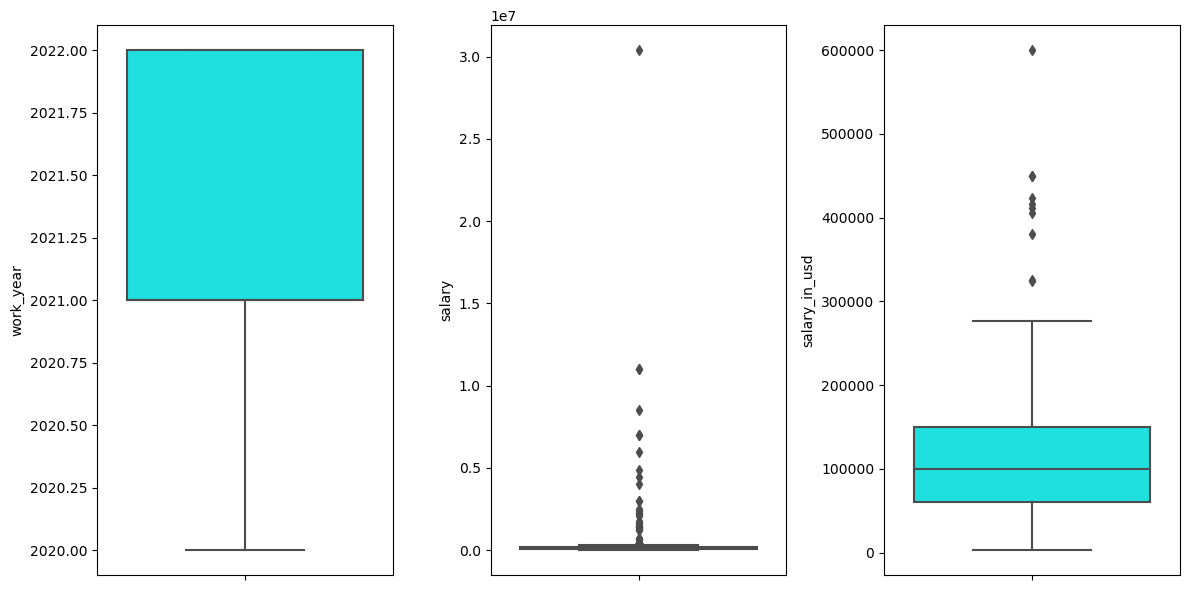

In [25]:
# Set the figure size for the plot
plt.figure(figsize=(12,6))

# Define the list of numerical features to plot
features = numerical

# Loop through each numerical feature for plotting
for i in range(0, len(features)):
    # Create subplots for each numerical feature
    plt.subplot(1, len(features), i+1)
    
    # Plot a boxplot for the current numerical feature
    sns.boxplot(y=df[features[i]], color='cyan')
    
    # Ensure tight layout to prevent overlapping
    plt.tight_layout()

# Notes:
# - plt.figure(figsize=(12,6)): Sets the figure size of the plot to (12, 6) inches.
# - 'features = numerical': This list contains the names of columns that are considered numerical.
# - The loop iterates through each numerical feature and creates a subplot for each one.
# - 'plt.subplot(1, len(features), i+1)': Creates subplots in a single row, with the number of subplots equal to the number of numerical features.
# - 'sns.boxplot(y=df[features[i]], color='cyan')': Plots a boxplot for the current numerical feature using Seaborn's boxplot function. 'y' specifies the data to be plotted on the y-axis.
# - 'plt.tight_layout()': Ensures tight layout to prevent overlapping of subplots.
# - This code creates a set of boxplots, one for each numerical feature in the DataFrame, allowing visualization of the distribution, central tendency, and variability of each numerical variable.

Text(0.5, 1.0, 'Company Size')

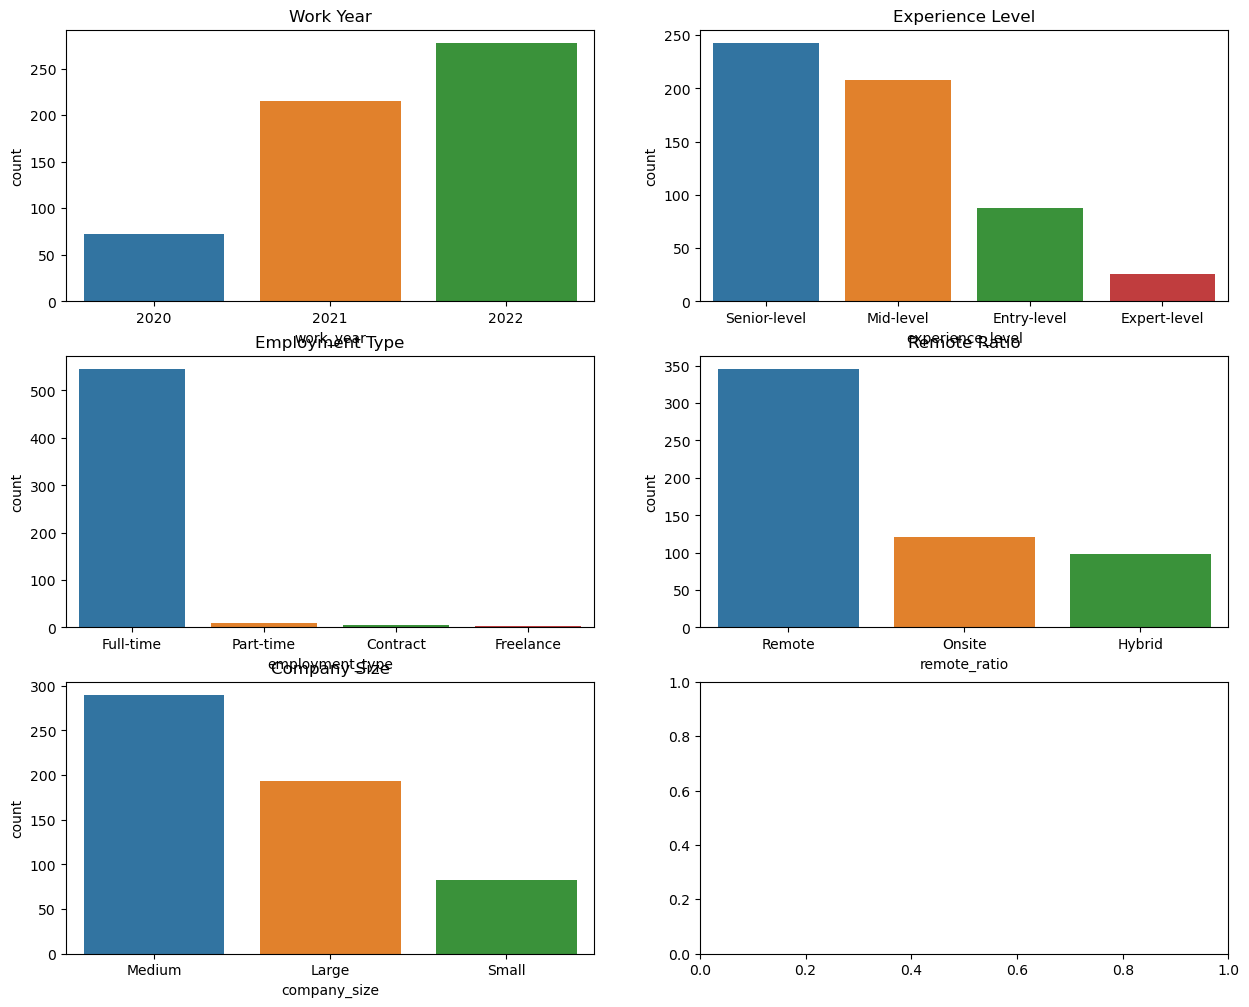

In [26]:
# Create a figure with subplots arranged in a 3x2 grid and set the figure size
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Plot bar plots for each categorical variable
# Work Year
sns.barplot(x=df["work_year"].value_counts().sort_values(ascending=False).index, 
            y=df["work_year"].value_counts().sort_values(ascending=False), 
            ax=axes[0][0])
axes[0][0].set_title("Work Year")

# Experience Level
sns.barplot(x=df["experience_level"].value_counts().sort_values(ascending=False).index, 
            y=df["experience_level"].value_counts().sort_values(ascending=False), 
            ax=axes[0][1])
axes[0][1].set_title("Experience Level")

# Employment Type
sns.barplot(x=df["employment_type"].value_counts().sort_values(ascending=False).index, 
            y=df["employment_type"].value_counts().sort_values(ascending=False), 
            ax=axes[1][0])
axes[1][0].set_title("Employment Type")

# Remote Ratio
sns.barplot(x=df["remote_ratio"].value_counts().sort_values(ascending=False).index, 
            y=df["remote_ratio"].value_counts().sort_values(ascending=False), 
            ax=axes[1][1])
axes[1][1].set_title("Remote Ratio")

# Company Size
sns.barplot(x=df["company_size"].value_counts().sort_values(ascending=False).index, 
            y=df["company_size"].value_counts().sort_values(ascending=False), 
            ax=axes[2][0])
axes[2][0].set_title("Company Size")

# Notes:
# - fig, axes = plt.subplots(3, 2, figsize=(15, 12)): This line creates a figure with subplots arranged in a 3x2 grid with the specified figure size.
# - sns.barplot(): This function is used to create bar plots.
# - x and y parameters specify the data for the x-axis and y-axis, respectively.
# - ax parameter specifies the subplot to which the bar plot will be plotted.
# - For each categorical variable, a bar plot is created and added to the appropriate subplot.
# - axes[row_index][column_index].set_title(): This method sets the title for each subplot.
# - This code generates a set of bar plots for each categorical variable, providing insights into the distribution of categories within each variable.

Text(0.5, 0, '')

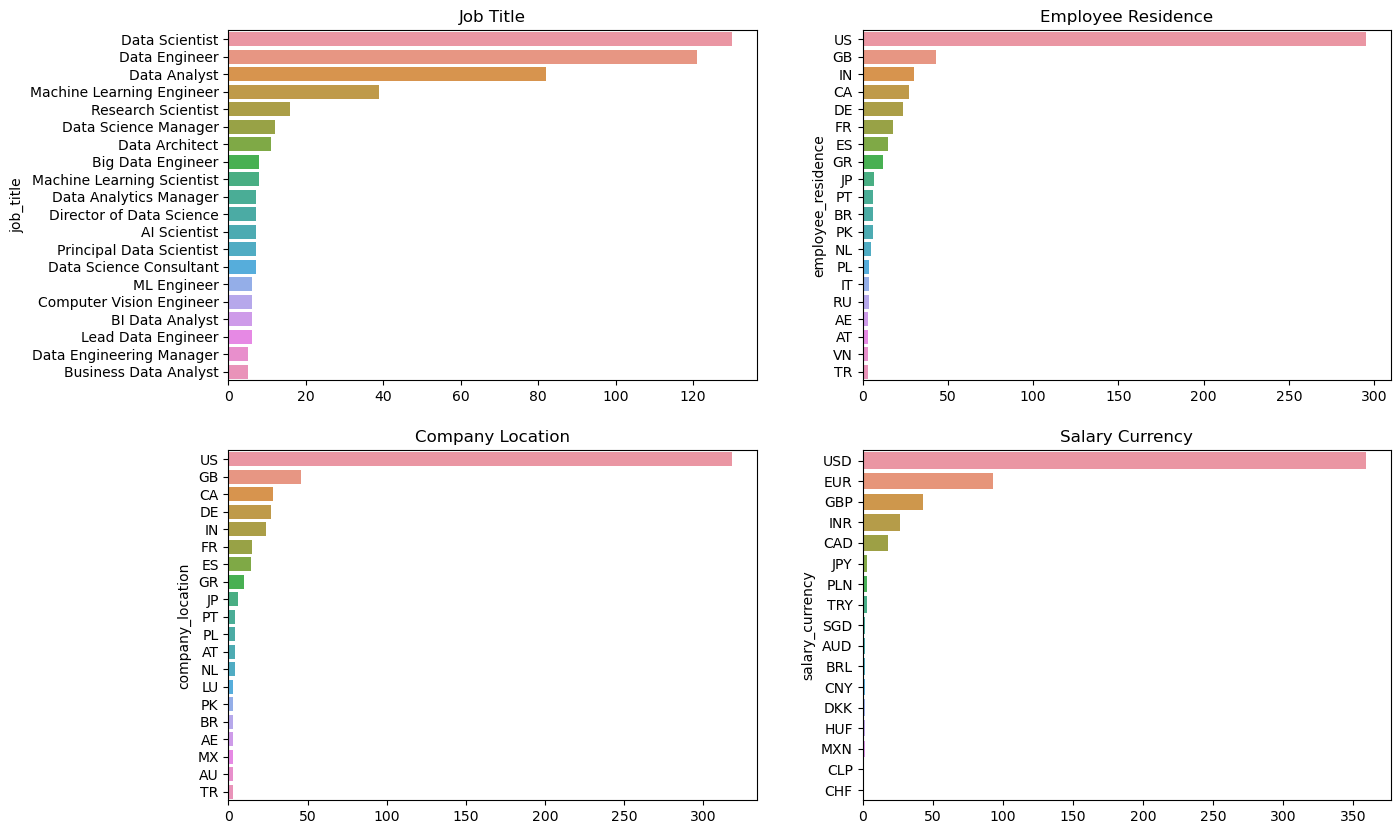

In [27]:
# Create a figure with subplots arranged in a 2x2 grid and set the figure size
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot bar plots for each categorical variable
# Job Title
sns.barplot(x=df["job_title"].value_counts().sort_values(ascending=False).head(20), 
            y=df["job_title"].value_counts().sort_values(ascending=False).head(20).index, 
            ax=axes[0][0])
axes[0][0].set_title("Job Title")
axes[0][0].set_xlabel("")

# Employee Residence
sns.barplot(x=df["employee_residence"].value_counts().sort_values(ascending=False).head(20), 
            y=df["employee_residence"].value_counts().sort_values(ascending=False).head(20).index, 
            ax=axes[0][1])
axes[0][1].set_title("Employee Residence")
axes[0][1].set_xlabel("")

# Company Location
sns.barplot(x=df["company_location"].value_counts().sort_values(ascending=False).head(20), 
            y=df["company_location"].value_counts().sort_values(ascending=False).head(20).index, 
            ax=axes[1][0])
axes[1][0].set_title("Company Location")
axes[1][0].set_xlabel("")

# Salary Currency
sns.barplot(x=df["salary_currency"].value_counts().sort_values(ascending=False).head(20), 
            y=df["salary_currency"].value_counts().sort_values(ascending=False).head(20).index, 
            ax=axes[1][1])
axes[1][1].set_title("Salary Currency")
axes[1][1].set_xlabel("")

# Notes:
# - fig, axes = plt.subplots(2, 2, figsize=(15, 10)): This line creates a figure with subplots arranged in a 2x2 grid with the specified figure size.
# - sns.barplot(): This function is used to create bar plots.
# - x and y parameters specify the data for the x-axis and y-axis, respectively.
# - ax parameter specifies the subplot to which the bar plot will be plotted.
# - For each categorical variable, a bar plot is created and added to the appropriate subplot.
# - axes[row_index][column_index].set_title(): This method sets the title for each subplot.
# - axes[row_index][column_index].set_xlabel(""): This method removes the x-axis label for better readability.
# - This code generates a set of bar plots for each categorical variable, showing the top 20 categories in each variable.

Text(0.5, 1.0, 'Highest Salary Jobs')

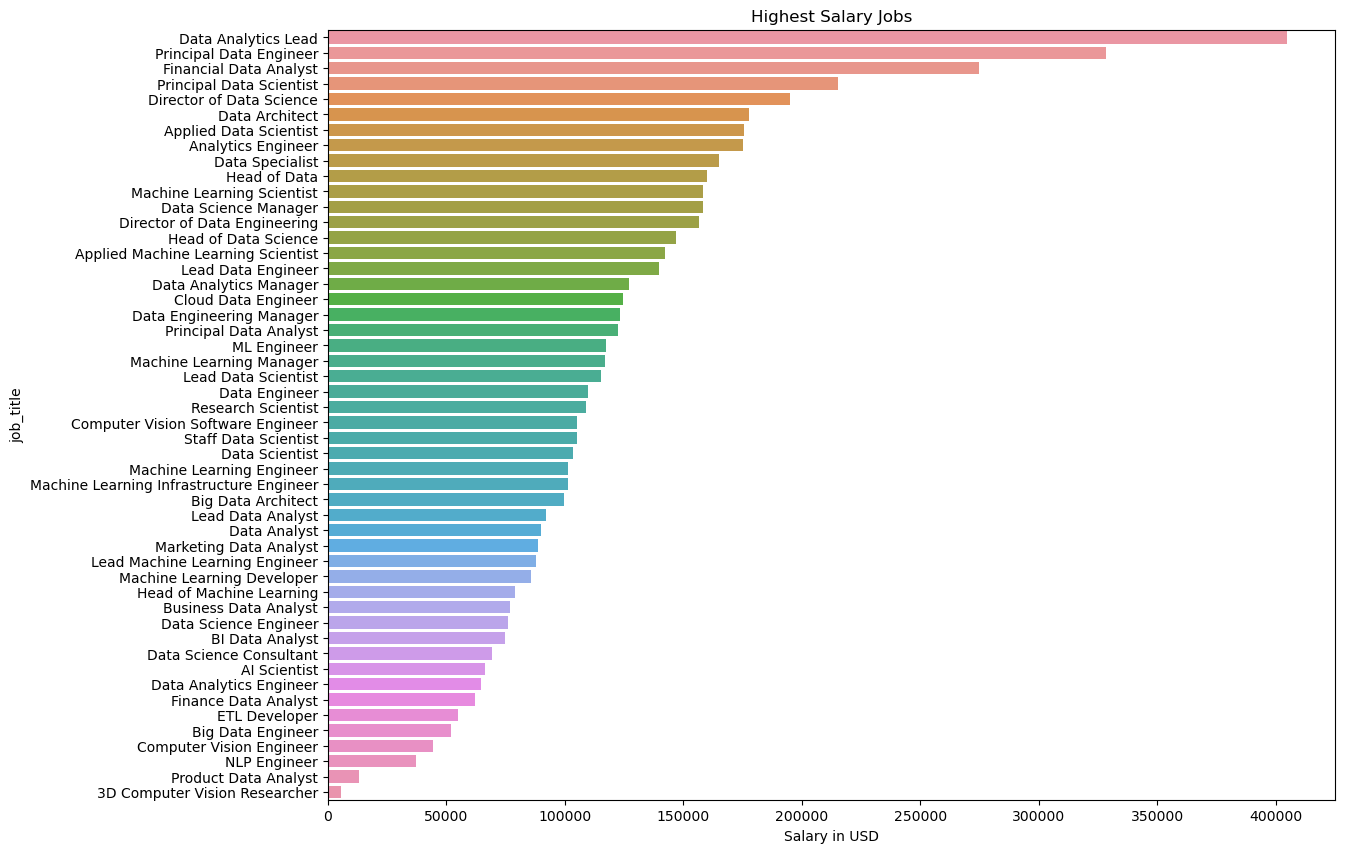

In [28]:
# Set the figure size for the plot
plt.figure(figsize=(13, 10))

# Plot a bar plot showing the mean salary in USD for each job title
sns.barplot(x=df.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending=False), 
            y=df.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending=False).index)

# Set the label for the x-axis
plt.xlabel("Salary in USD")

# Set the title of the plot
plt.title("Highest Salary Jobs")

# Notes:
# - plt.figure(figsize=(13, 10)): This line sets the figure size of the plot to (13, 10) inches.
# - sns.barplot(): This function is used to create a bar plot.
# - x and y parameters specify the data for the x-axis and y-axis, respectively.
# - df.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending=False): This expression calculates the mean salary in USD for each job title, sorts the results in descending order of salary, and provides the values for the x-axis (bar lengths).
# - df.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending=False).index: This expression provides the job titles as the y-axis labels.
# - plt.xlabel("Salary in USD"): This line sets the label for the x-axis.
# - plt.title("Highest Salary Jobs"): This line sets the title of the plot.
# - This code generates a bar plot showing the average salary in USD for each job title, sorted by highest average salary.

In [29]:
# Define a list of columns of interest, including 'salary_in_usd' and 'job_title'
dftopsalary = ['salary_in_usd', 'job_title']

# Retrieve the maximum value for each column in the specified list from the DataFrame 'df'
df[dftopsalary].max()

# Notes:
# - 'dftopsalary': This list contains the names of columns of interest from which we want to retrieve the maximum values.
# - df[dftopsalary]: This expression selects the specified columns of interest from the DataFrame 'df'.
# - .max(): This method computes the maximum value for each column in the DataFrame selected.
# - The output is a Series where the index represents the column names, and the values represent the maximum value for each column.

salary_in_usd                  600000
job_title        Staff Data Scientist
dtype: object

In [30]:
# Retrieve the minimum value for each column in the specified list from the DataFrame 'df'
df[dftopsalary].min()

# Notes:
# - df[dftopsalary]: This expression selects the specified columns of interest from the DataFrame 'df'.
# - .min(): This method computes the minimum value for each column in the DataFrame selected.
# - The output is a Series where the index represents the column names, and the values represent the minimum value for each column.

salary_in_usd                             2859
job_title        3D Computer Vision Researcher
dtype: object

In [31]:
# Group the DataFrame 'df' by the 'work_year' column and aggregate the count of job titles for each work year
# The result will have a column 'job_title' containing the count of job titles for each work year
# Reset the index to make the 'work_year' column a regular column rather than an index
df.groupby(['work_year']).agg(
    job_title=('job_title', 'count')
).reset_index()

# Notes:
# - df.groupby(['work_year']): This groups the DataFrame 'df' by the 'work_year' column.
# - .agg(): This method is used to perform aggregation operations on grouped data.
# - Inside .agg(), we specify the aggregation as a dictionary where the key is the name of the new aggregated column, and the value is a tuple containing the column to aggregate ('job_title') and the aggregation function ('count').
# - The aggregation function 'count' counts the occurrences of non-null values in the 'job_title' column for each group of work years.
# - .reset_index(): This resets the index of the resulting DataFrame, converting the 'work_year' index back into a regular column.
# - The resulting DataFrame will have three columns: 'work_year', 'job_title' (containing the count of job titles for each work year), and the default index.

,work_year,job_title
0,2020,72
1,2021,215
2,2022,278


In [32]:
# Count the occurrences of each unique salary value in the 'salary' column of the DataFrame 'df'
df.salary.value_counts()

# Notes:
# - df.salary.value_counts(): This expression counts the occurrences of each unique value in the 'salary' column of the DataFrame 'df'.
# - The value_counts() method returns a Series where the unique salary values are the index, and the corresponding values represent the count of occurrences of each salary value.
# - This method is useful for understanding the distribution of salaries and identifying common salary values or outliers.
# - It provides insights into the frequency of different salary levels within the dataset.

salary
80000      18
100000     16
120000     15
60000      14
150000     14
           ..
39600       1
1335000     1
52500       1
31000       1
129000      1
Name: count, Length: 272, dtype: int64

In [33]:
# Filter the DataFrame 'df' to include only rows where the 'work_year' column has the value 2022
df22 = df[df["work_year"] == 2022]

# Display the first few rows of the filtered DataFrame 'df22'
df22.head()

# Notes:
# - df[df["work_year"] == 2022]: This expression filters the DataFrame 'df' to include only rows where the value in the 'work_year' column is equal to 2022.
# - The result is stored in a new DataFrame called 'df22'.
# - This operation effectively subsets the data to focus on entries corresponding to the year 2022.
# - df22.head(): This displays the first few rows of the filtered DataFrame 'df22', providing a glimpse of the data entries for the year 2022.

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
287,2022,Senior-level,Full-time,Data Engineer,135000,USD,135000,US,Remote,US,Medium
288,2022,Senior-level,Full-time,Data Analyst,155000,USD,155000,US,Remote,US,Medium
289,2022,Senior-level,Full-time,Data Analyst,120600,USD,120600,US,Remote,US,Medium
290,2022,Mid-level,Full-time,Data Scientist,130000,USD,130000,US,Onsite,US,Medium
291,2022,Mid-level,Full-time,Data Scientist,90000,USD,90000,US,Onsite,US,Medium


In [34]:
# Count the occurrences of each unique job title in the filtered DataFrame 'df22'
# Then, display the top 10 most common job titles
df22.job_title.value_counts().head(10)

# Notes:
# - df22.job_title.value_counts(): This expression counts the occurrences of each unique job title in the 'job_title' column of the filtered DataFrame 'df22'.
# - .head(10): This method is used to select the top 10 most common job titles based on their frequencies.
# - The result is a Series where the index represents the unique job titles, and the values represent the count of occurrences of each job title.
# - This operation provides insights into the most common job titles within the subset of data corresponding to the year 2022.
# - It helps in understanding the distribution of job titles and identifying the most prevalent roles during that specific year.

job_title
Data Engineer                79
Data Scientist               65
Data Analyst                 58
Machine Learning Engineer    16
Data Architect                8
Data Science Manager          5
Analytics Engineer            4
Research Scientist            4
Data Analytics Manager        4
Applied Data Scientist        3
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 Data Science Jobs in 2022')

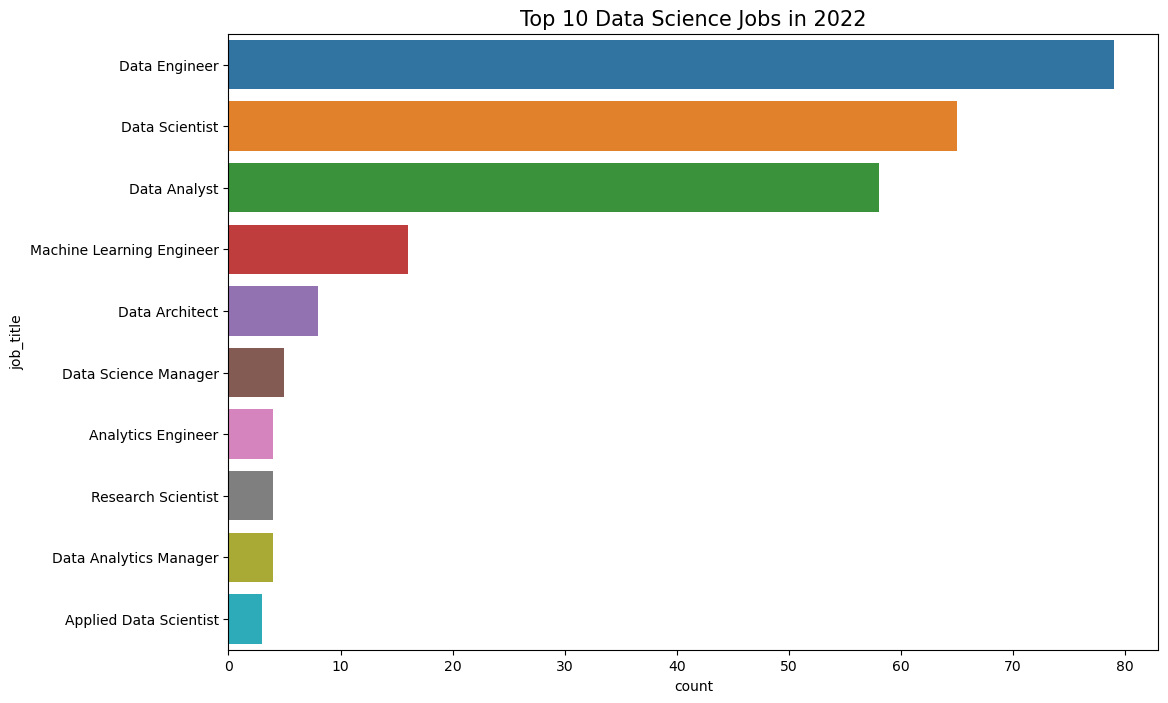

In [35]:
# Set the figure size for the plot
plt.figure(figsize=(12, 8))

# Plot a bar plot showing the top 10 most common job titles in 2022
sns.barplot(x=df22["job_title"].value_counts().sort_values(ascending=False).head(10), 
            y=df22["job_title"].value_counts().sort_values(ascending=False).head(10).index)

# Set the title of the plot
plt.title('Top 10 Data Science Jobs in 2022', fontsize=15)

# Notes:
# - plt.figure(figsize=(12, 8)): This line sets the figure size of the plot to (12, 8) inches.
# - sns.barplot(): This function is used to create a bar plot.
# - x and y parameters specify the data for the x-axis and y-axis, respectively.
# - df22["job_title"].value_counts().sort_values(ascending=False).head(10): This expression calculates the counts of each unique job title, sorts them in descending order of frequency, and selects the top 10 most common job titles.
# - The result is plotted as bars where the length of the bars represents the frequency of each job title.
# - plt.title('Top 10 Data Science Jobs in 2022', fontsize=15): This line sets the title of the plot with a specific font size.
# - This code generates a bar plot showing the top 10 most common job titles in the field of data science for the year 2022.

Text(0.5, 1.0, 'Variation of remote ratio from 2020-2022')

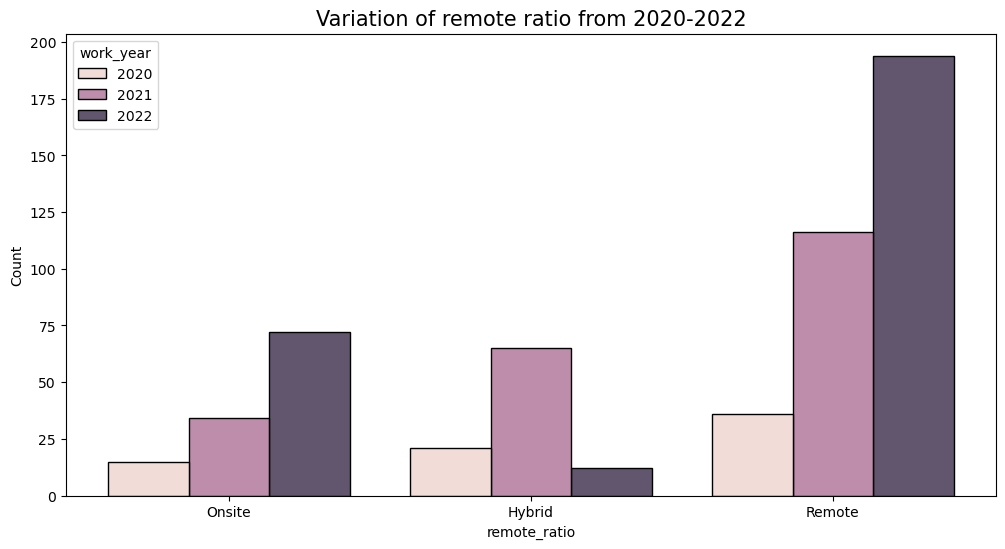

In [36]:
# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Plot a histogram of the 'remote_ratio' column with hue representing 'work_year'
# 'multiple = "dodge"' is used to plot histograms for each 'work_year' separately with dodge layout
# 'shrink = 0.8' adjusts the width of each histogram bar for better visualization
sns.histplot(data=df, x='remote_ratio', hue='work_year', multiple='dodge', shrink=0.8)

# Set the title of the plot
plt.title('Variation of remote ratio from 2020-2022', fontsize=15)

# Notes:
# - plt.figure(figsize=(12, 6)): This line sets the figure size of the plot to (12, 6) inches.
# - sns.histplot(): This function is used to create a histogram plot.
# - data=df: This specifies the DataFrame containing the data to be plotted.
# - x='remote_ratio': This specifies the column to be plotted on the x-axis, which is 'remote_ratio'.
# - hue='work_year': This parameter adds color differentiation to the histogram bars based on the 'work_year' column.
# - multiple='dodge': This parameter sets the layout of the histograms, plotting them for each 'work_year' separately.
# - shrink=0.8: This parameter adjusts the width of each histogram bar for better visualization.
# - plt.title('Variation of remote ratio from 2020-2022', fontsize=15): This line sets the title of the plot with a specific font size.
# - This code generates a histogram showing the variation of remote ratio across different years (2020-2022) using color differentiation.

Text(0.5, 1.0, 'Salary variation with experience level')

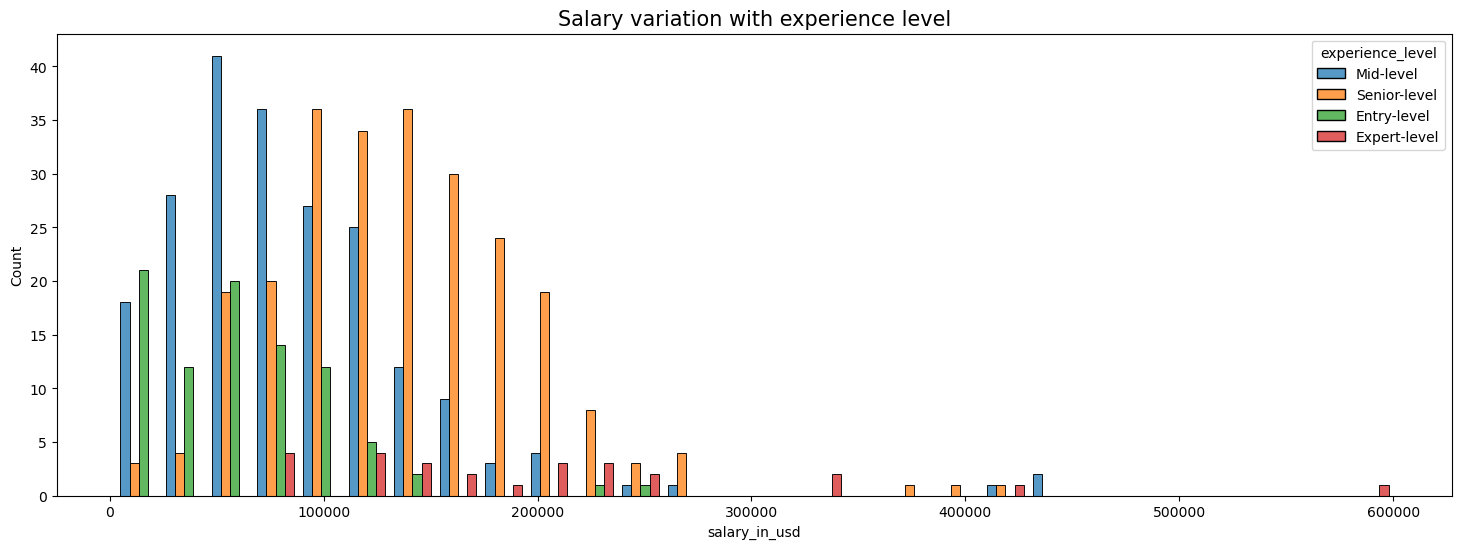

In [37]:
# Set the figure size for the plot
plt.figure(figsize=(18, 6))

# Plot a histogram of the 'salary_in_usd' column with hue representing 'experience_level'
# 'multiple = "dodge"' is used to plot histograms for each 'experience_level' separately with dodge layout
# 'shrink = 0.8' adjusts the width of each histogram bar for better visualization
sns.histplot(data=df, x=df.salary_in_usd, hue='experience_level', multiple='dodge', shrink=0.8)

# Set the title of the plot
plt.title('Salary variation with experience level', fontsize=15)

# Notes:
# - plt.figure(figsize=(18, 6)): This line sets the figure size of the plot to (18, 6) inches.
# - sns.histplot(): This function is used to create a histogram plot.
# - data=df: This specifies the DataFrame containing the data to be plotted.
# - x=df.salary_in_usd: This specifies the column to be plotted on the x-axis, which is 'salary_in_usd'.
# - hue='experience_level': This parameter adds color differentiation to the histogram bars based on the 'experience_level' column.
# - multiple='dodge': This parameter sets the layout of the histograms, plotting them for each 'experience_level' separately.
# - shrink=0.8: This parameter adjusts the width of each histogram bar for better visualization.
# - plt.title('Salary variation with experience level', fontsize=15): This line sets the title of the plot with a specific font size.
# - This code generates a histogram showing the variation of salary across different experience levels using color differentiation.

Text(0.5, 1.0, 'Company Locations with Most Workers')

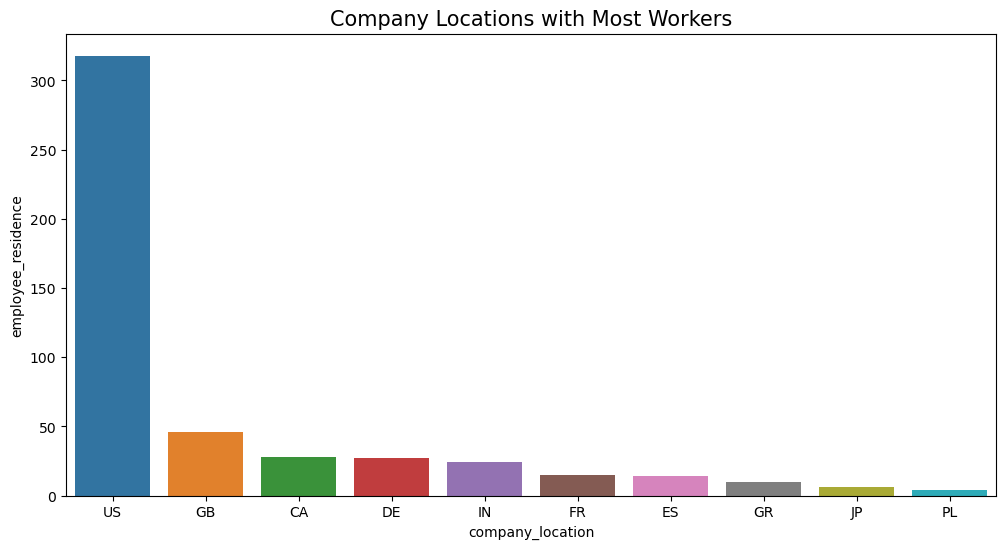

In [38]:
# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Plot a bar plot showing the count of employees' residences for the top 10 company locations with the most workers
# x-axis represents the top 10 company locations based on the count of employees' residences
# y-axis represents the count of employees' residences for each company location
sns.barplot(x=df.groupby("company_location")["employee_residence"].count().sort_values(ascending=False).head(10).index, 
            y=df.groupby("company_location")["employee_residence"].count().sort_values(ascending=False).head(10))

# Set the title of the plot
plt.title("Company Locations with Most Workers", fontsize=15)

# Notes:
# - plt.figure(figsize=(12, 6)): This line sets the figure size of the plot to (12, 6) inches.
# - sns.barplot(): This function is used to create a bar plot.
# - x and y parameters specify the data for the x-axis and y-axis, respectively.
# - df.groupby("company_location")["employee_residence"].count().sort_values(ascending=False).head(10).index: This expression calculates the count of employees' residences for each company location, sorts them in descending order, selects the top 10 locations, and extracts the index, which represents the company locations.
# - df.groupby("company_location")["employee_residence"].count().sort_values(ascending=False).head(10): This expression calculates the count of employees' residences for each company location, sorts them in descending order, and selects the top 10 locations.
# - The result is plotted as bars where the length of the bars represents the count of employees' residences for each company location.
# - plt.title("Company Locations with Most Workers", fontsize=15): This line sets the title of the plot with a specific font size.
# - This code generates a bar plot showing the top 10 company locations with the most workers based on the count of employees' residences.

Text(0.5, 1.0, 'Salary Range for Work Year')

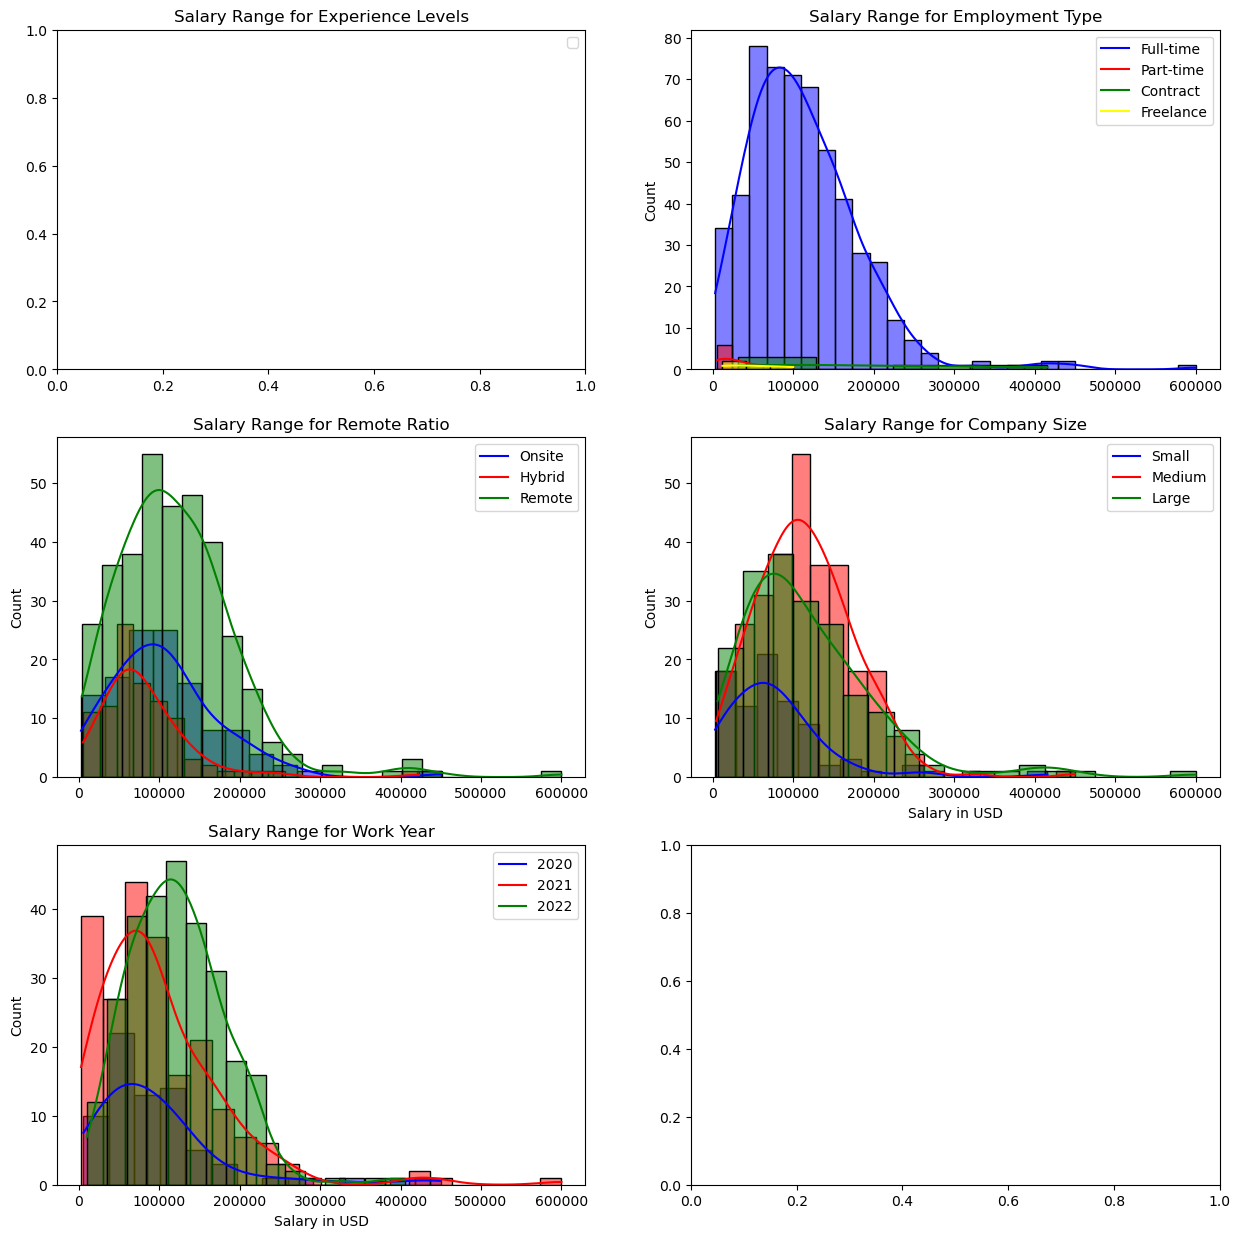

In [39]:
# Create a grid of subplots with 3 rows and 2 columns, and set the figure size
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot histograms for salary ranges based on different categorical variables

# Plot for experience levels
sns.histplot(df.query("experience_level == 'Entry'")["salary_in_usd"], kde=True, color="blue", ax=axes[0][0])
sns.histplot(df.query("experience_level == 'Junior'")["salary_in_usd"], kde=True, color="red", ax=axes[0][0])
sns.histplot(df.query("experience_level == 'Senior'")["salary_in_usd"], kde=True, color="green", ax=axes[0][0])
sns.histplot(df.query("experience_level == 'Expert'")["salary_in_usd"], kde=True, color="yellow", ax=axes[0][0])
axes[0][0].legend(labels=["Entry", "Junior", "Senior", "Expert"])
axes[0][0].set_xlabel("")
axes[0][0].set_title("Salary Range for Experience Levels")

# Plot for employment types
sns.histplot(df.query("employment_type == 'Full-time'")["salary_in_usd"], kde=True, color="blue", ax=axes[0][1])
sns.histplot(df.query("employment_type == 'Part-time'")["salary_in_usd"], kde=True, color="red", ax=axes[0][1])
sns.histplot(df.query("employment_type == 'Contract'")["salary_in_usd"], kde=True, color="green", ax=axes[0][1])
sns.histplot(df.query("employment_type == 'Freelance'")["salary_in_usd"], kde=True, color="yellow", ax=axes[0][1])
axes[0][1].legend(labels=["Full-time", "Part-time", "Contract", "Freelance"])
axes[0][1].set_xlabel("")
axes[0][1].set_title("Salary Range for Employment Type")

# Plot for remote ratios
sns.histplot(df.query("remote_ratio == 'Onsite'")["salary_in_usd"], kde=True, color="blue", ax=axes[1][0])
sns.histplot(df.query("remote_ratio == 'Hybrid'")["salary_in_usd"], kde=True, color="red", ax=axes[1][0])
sns.histplot(df.query("remote_ratio == 'Remote'")["salary_in_usd"], kde=True, color="green", ax=axes[1][0])
axes[1][0].legend(labels=["Onsite", "Hybrid", "Remote"])
axes[1][0].set_xlabel("")
axes[1][0].set_title("Salary Range for Remote Ratio")

# Plot for company sizes
sns.histplot(df.query("company_size == 'Small'")["salary_in_usd"], kde=True, color="blue", ax=axes[1][1])
sns.histplot(df.query("company_size == 'Medium'")["salary_in_usd"], kde=True, color="red", ax=axes[1][1])
sns.histplot(df.query("company_size == 'Large'")["salary_in_usd"], kde=True, color="green", ax=axes[1][1])
axes[1][1].legend(labels=["Small", "Medium", "Large"])
axes[1][1].set_xlabel("Salary in USD")
axes[1][1].set_title("Salary Range for Company Size")

# Plot for work years
sns.histplot(df.query("work_year == 2020")["salary_in_usd"], kde=True, color="blue", ax=axes[2][0])
sns.histplot(df.query("work_year == 2021")["salary_in_usd"], kde=True, color="red", ax=axes[2][0])
sns.histplot(df.query("work_year == 2022")["salary_in_usd"], kde=True, color="green", ax=axes[2][0])
axes[2][0].legend(labels=["2020", "2021", "2022"])
axes[2][0].set_xlabel("Salary in USD")
axes[2][0].set_title("Salary Range for Work Year")

# Notes:
# - fig, axes = plt.subplots(3, 2, figsize=(15, 15)): This line creates a grid of subplots with 3 rows and 2 columns, with a figure size of (15, 15) inches.
# - For each subplot, sns.histplot() is used to create a histogram showing the salary distribution based on different categorical variables.
# - KDE (Kernel Density Estimation) is enabled to show the smoothed distribution curve along with the histogram bars.
# - legends, x-axis labels, and titles are set for each subplot to provide clarity and context.
# - Each subplot represents the salary range distribution for different categorical variables such as experience levels, employment types, remote ratios, company sizes, and work years.

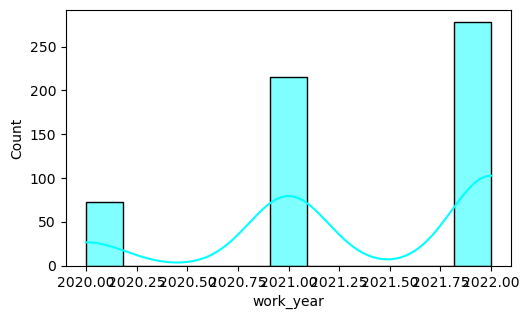

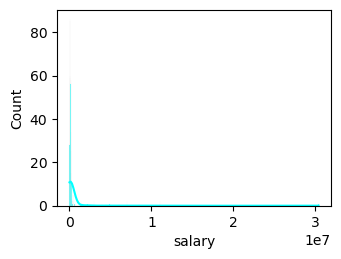

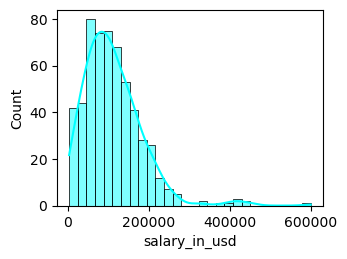

In [40]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Iterate through numerical features and create histograms for each
features = numerical
for i in range(0, len(features)):
    # Create subplots with appropriate layout
    plt.subplot(2, len(features) // 2 + 1, i + 1)
    
    # Plot histogram using seaborn's histplot function
    sns.histplot(x=df[features[i]], color='cyan', kde=True)
    
    # Set the layout tight for better visualization
    plt.tight_layout()

    # Show the plot
    plt.show()

# Notes:
# - plt.figure(figsize=(10, 6)): This line sets the figure size of the plot to (10, 6) inches.
# - The code iterates through numerical features and creates a histogram for each feature.
# - Each histogram is plotted using seaborn's histplot function, with KDE enabled for smooth distribution curve.
# - Subplots are arranged in a grid layout based on the number of numerical features.
# - The tight layout is set to avoid overlap between subplots.
# - plt.show() is called inside the loop to display each subplot individually.

In [41]:
# Filter the DataFrame 'df' to include only rows where the 'job_title' column contains 'Data Engineer', 'Data Scientist', or 'Data Analyst'
df2 = df[df['job_title'].isin(['Data Engineer', 'Data Scientist', 'Data Analyst'])]

# Notes:
# - df['job_title'].isin(['Data Engineer', 'Data Scientist', 'Data Analyst']): This condition checks if the 'job_title' column contains any of the specified job titles: 'Data Engineer', 'Data Scientist', or 'Data Analyst'.
# - df[df['job_title'].isin(['Data Engineer', 'Data Scientist', 'Data Analyst'])]: This filters the DataFrame 'df' to include only the rows where the condition is True, effectively selecting rows where the job title matches any of the specified titles.
# - The filtered DataFrame is assigned to the variable 'df2'.

In [42]:
# Count the occurrences of each unique job title within the filtered DataFrame df2
# This DataFrame contains only rows where the job title is 'Data Engineer', 'Data Scientist', or 'Data Analyst'
df2['job_title'].value_counts()

# Notes:
# - df2['job_title']: This selects the 'job_title' column from the DataFrame df2.
# - .value_counts(): This method counts the occurrences of each unique value in the 'job_title' column.
# - The result is a Series where the index represents unique job titles ('Data Engineer', 'Data Scientist', 'Data Analyst'), and the values represent the count of occurrences of each job title.
# - This operation provides insights into the distribution of specific job titles ('Data Engineer', 'Data Scientist', 'Data Analyst') within the filtered dataset df2.

job_title
Data Scientist    130
Data Engineer     121
Data Analyst       82
Name: count, dtype: int64

In [43]:
# Drop columns 'work_year', 'salary_currency', and 'salary' from the DataFrame df2
# These columns are removed from the DataFrame to focus only on specific job titles and associated features
df2 = df2.drop(['work_year', 'salary_currency', 'salary'], axis=1)

# Notes:
# - df2.drop(['work_year', 'salary_currency', 'salary'], axis=1): This method drops the specified columns from the DataFrame df2.
# - The axis=1 parameter indicates that columns are being dropped.
# - The columns 'work_year', 'salary_currency', and 'salary' are removed from the DataFrame to focus solely on other features associated with specific job titles.
# - The modified DataFrame is assigned back to the variable df2.

In [44]:
# Add a new column 'same_working_country' to the DataFrame df2 based on conditions comparing 'employee_residence' and 'company_location'
# If the employee's residence country matches the company's location country, set the value to 'Local Worker', otherwise set it to 'Expatriate'
df2['same_working_country'] = df2.apply(lambda x: 'Local Worker' if x['employee_residence'] == x['company_location'] else 'Expatriate', axis=1)

# Drop columns 'employee_residence' and 'company_location' from the DataFrame df2
# These columns are removed as they are no longer needed after creating the new column 'same_working_country'
df2 = df2.drop(['employee_residence', 'company_location'], axis=1)

# Print a message indicating that the column 'same_working_country' has been added
print("STATUS: Added column same_working_country")

# Notes:
# - df2.apply(): This method applies a function along the axis of the DataFrame.
# - lambda x: 'Local Worker' if x['employee_residence'] == x['company_location'] else 'Expatriate': This lambda function checks if the employee's residence country matches the company's location country. If they match, it assigns the value 'Local Worker', otherwise 'Expatriate'.
# - The resulting series from applying the lambda function is assigned to the new column 'same_working_country'.
# - df2.drop(['employee_residence', 'company_location'], axis=1): This line drops the specified columns ('employee_residence' and 'company_location') from the DataFrame df2. The axis=1 parameter indicates that columns are being dropped.
# - The print statement provides feedback indicating that the column 'same_working_country' has been added to the DataFrame.

STATUS: Added column same_working_country


In [45]:
# Count the occurrences of each unique value in the column 'same_working_country' of the DataFrame df2
# This provides insights into the distribution of employees working in the same country as their residence and those working as expatriates
df2['same_working_country'].value_counts()

# Notes:
# - df2['same_working_country']: This selects the column 'same_working_country' from the DataFrame df2.
# - .value_counts(): This method counts the occurrences of each unique value in the selected column.
# - The result is a Series where the index represents the unique values ('Local Worker' and 'Expatriate') and the values represent the count of occurrences of each value.
# - This operation provides insights into the distribution of employees based on whether they work in the same country as their residence or as expatriates.

same_working_country
Local Worker    314
Expatriate       19
Name: count, dtype: int64

In [46]:
# Reset the index of the DataFrame df2 and drop the previous index
# This operation reassigns new sequential indices to the DataFrame and drops the existing index, ensuring a clean index without any gaps or remnants of previous indexing
df2 = df2.reset_index(drop=True)

# Notes:
# - df2.reset_index(drop=True): This method resets the index of the DataFrame df2.
#   - The drop=True parameter indicates that the previous index should be dropped rather than being added as a new column in the DataFrame.
#   - This operation ensures that the index is reset to a new sequential index starting from 0, and any existing index is discarded.
# - The modified DataFrame with the reset index is assigned back to the variable df2.

In [47]:
# This code simply displays the DataFrame df2.
df2

# Notes:

# The DataFrame df2 contains the filtered and modified dataset, potentially with specific columns dropped and new columns added.
# Displaying df2 allows you to inspect the current state of the DataFrame after performing various operations such as filtering, dropping columns, and adding new columns.
# It helps in verifying the changes made to the DataFrame and ensuring that the data manipulation steps were executed correctly.

,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,same_working_country
0,Mid-level,Full-time,Data Scientist,79833,Onsite,Large,Local Worker
1,Entry-level,Full-time,Data Analyst,72000,Remote,Large,Local Worker
2,Mid-level,Full-time,Data Scientist,35735,Hybrid,Large,Local Worker
3,Entry-level,Full-time,Data Scientist,51321,Onsite,Small,Local Worker
4,Mid-level,Full-time,Data Scientist,40481,Onsite,Large,Local Worker
...,...,...,...,...,...,...,...
328,Entry-level,Full-time,Data Analyst,52000,Onsite,Medium,Local Worker
329,Senior-level,Full-time,Data Engineer,154000,Remote,Medium,Local Worker
330,Senior-level,Full-time,Data Engineer,126000,Remote,Medium,Local Worker
331,Senior-level,Full-time,Data Analyst,129000,Onsite,Medium,Local Worker


In [48]:
newdf = df2.copy()  # Create a copy of the DataFrame df2
newdf = pd.get_dummies(data=newdf, columns=['experience_level', 'employment_type', 'job_title', 'remote_ratio', 'company_size', 'same_working_country'])
newdf

# Notes:

# The pd.get_dummies() function is used for one-hot encoding categorical variables in the DataFrame.
# The columns parameter specifies the columns for which one-hot encoding should be applied.
# The resulting DataFrame newdf contains the original numerical columns along with newly created dummy variables for each category in the specified categorical columns.
# One-hot encoding is commonly used in machine learning pipelines to handle categorical data before model training.
# Displaying newdf allows you to inspect the transformed DataFrame and verify the one-hot encoding process.

,salary_in_usd,experience_level_Entry-level,experience_level_Expert-level,experience_level_Mid-level,experience_level_Senior-level,employment_type_Freelance,employment_type_Full-time,employment_type_Part-time,job_title_Data Analyst,job_title_Data Engineer,job_title_Data Scientist,remote_ratio_Hybrid,remote_ratio_Onsite,remote_ratio_Remote,company_size_Large,company_size_Medium,company_size_Small,same_working_country_Expatriate,same_working_country_Local Worker
0,79833,False,False,True,False,False,True,False,False,False,True,False,True,False,True,False,False,False,True
1,72000,True,False,False,False,False,True,False,True,False,False,False,False,True,True,False,False,False,True
2,35735,False,False,True,False,False,True,False,False,False,True,True,False,False,True,False,False,False,True
3,51321,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,True
4,40481,False,False,True,False,False,True,False,False,False,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,52000,True,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,True
329,154000,False,False,False,True,False,True,False,False,True,False,False,False,True,False,True,False,False,True
330,126000,False,False,False,True,False,True,False,False,True,False,False,False,True,False,True,False,False,True
331,129000,False,False,False,True,False,True,False,True,False,False,False,True,False,False,True,False,False,True
